In [56]:
import pandas as pd
from pybaseball import statcast, playerid_lookup, statcast_batter
import matplotlib.pyplot as plt

In [2]:
playerid_lookup("judge", "aaron")

Gathering player lookup table. This may take a moment.


,name_last,name_first,key_mlbam,key_retro,key_bbref,key_fangraphs,mlb_played_first,mlb_played_last
0,judge,aaron,592450,judga001,judgeaa01,15640,2016.0,2024.0


In [19]:
aaron_judge_data = statcast_batter("2024-04-01", "2024-08-25", player_id="592450")

Gathering Player Data


In [20]:
aaron_judge_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2253 entries, 0 to 2252
Data columns (total 94 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   pitch_type                       2250 non-null   object 
 1   game_date                        2253 non-null   object 
 2   release_speed                    2250 non-null   float64
 3   release_pos_x                    2250 non-null   float64
 4   release_pos_z                    2250 non-null   float64
 5   player_name                      2253 non-null   object 
 6   batter                           2253 non-null   int64  
 7   pitcher                          2253 non-null   int64  
 8   events                           537 non-null    object 
 9   description                      2253 non-null   object 
 10  spin_dir                         0 non-null      float64
 11  spin_rate_deprecated             0 non-null      float64
 12  break_angle_deprecat

In [55]:
aaron_judge_data.head()

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp,bat_speed,swing_length
0,FS,2024-08-24,86.4,-2.59,6.23,"Judge, Aaron",592450,687134,walk,ball,...,2,2,7,Strategic,Standard,214.0,0.014,0.220,NaN,NaN
1,FF,2024-08-24,95.3,-1.97,6.50,"Judge, Aaron",592450,687134,NaN,ball,...,2,2,7,Strategic,Standard,193.0,0.000,0.067,NaN,NaN
2,SL,2024-08-24,85.7,-2.65,6.40,"Judge, Aaron",592450,687134,NaN,swinging_strike,...,2,2,7,Strategic,Standard,89.0,0.000,-0.051,73.55127,9.42257
3,FS,2024-08-24,85.6,-2.62,6.24,"Judge, Aaron",592450,687134,NaN,ball,...,2,2,7,Strategic,Standard,223.0,0.000,0.038,NaN,NaN
4,FS,2024-08-24,84.8,-2.84,6.19,"Judge, Aaron",592450,687134,NaN,called_strike,...,2,2,7,Strategic,Standard,227.0,0.000,-0.031,NaN,NaN


In [49]:
aaron_judge_hrs = aaron_judge_data[aaron_judge_data["events"] == "home_run"]


In [51]:
aaron_judge_hrs = aaron_judge_hrs[["events", "hit_distance_sc"]]

In [62]:
hit_distance_sc = aaron_judge_hrs["hit_distance_sc"]

In [80]:
hit_distance_sc.describe()

count     49.000000
mean     408.877551
std       34.262244
min      339.000000
25%      380.000000
50%      406.000000
75%      432.000000
max      477.000000
Name: hit_distance_sc, dtype: float64

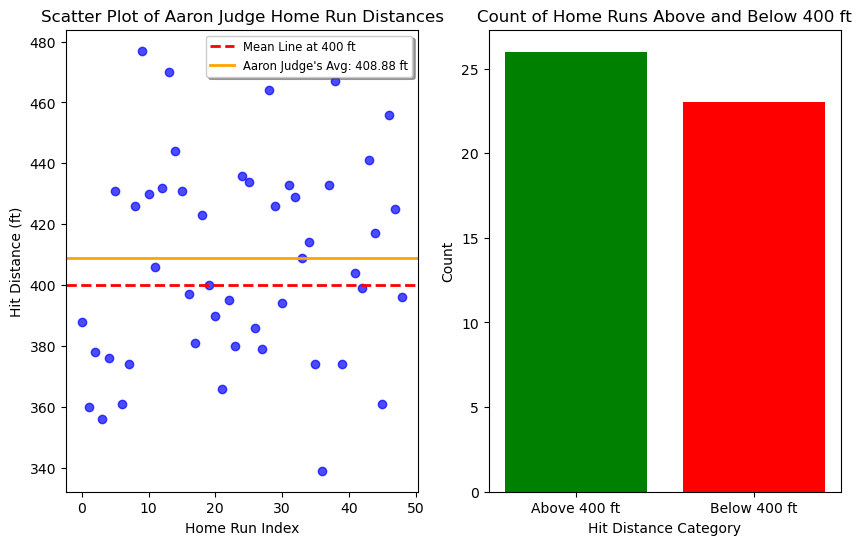

In [77]:
# Calculate Aaron Judge's average hit distance
average_distance = hit_distance_sc.mean()

# Calculate counts of home runs above and below 400 ft
above_mean_count = (hit_distance_sc > 400).sum()
below_mean_count = (hit_distance_sc <= 400).sum()

# Create a scatter plot
plt.figure(figsize=(10, 6))  # Set the figure size
plt.subplot(1,2,1)
plt.scatter(x=range(len(hit_distance_sc)), y=hit_distance_sc, color='blue', alpha=0.7)

plt.title('Scatter Plot of Aaron Judge Home Run Distances')
plt.xlabel('Home Run Index')
plt.ylabel('Hit Distance (ft)')

# Add a mean line at 400 ft
plt.axhline(y=400, color='red', linestyle='--', linewidth=2, label='Mean Line at 400 ft')

# Add a line for Aaron Judge's average hit distance
plt.axhline(y=average_distance, color='orange', linestyle='-', linewidth=2, label=f"Aaron Judge's Avg: {average_distance:.2f} ft")

# Add legend
plt.legend(loc='upper right', fontsize='small', shadow=True)

# Add labels and title
plt.subplot(1,2,2)
plt.bar(['Above 400 ft', 'Below 400 ft'], [above_mean_count, below_mean_count], color=['green', 'red'])
plt.title('Count of Home Runs Above and Below 400 ft')
plt.xlabel('Hit Distance Category')
plt.ylabel('Count')


# Show the plot
plt.show()

In [82]:
playerid_lookup("ohtani", "shohei")

,name_last,name_first,key_mlbam,key_retro,key_bbref,key_fangraphs,mlb_played_first,mlb_played_last
0,ohtani,shohei,660271,ohtas001,ohtansh01,19755,2018.0,2024.0


In [83]:
shohei_ohtani_data = statcast_batter("2024-04-01", "2024-08-25", player_id="660271")

Gathering Player Data


In [84]:
shohei_ohtani_hrs = shohei_ohtani_data[shohei_ohtani_data["events"] == "home_run"]

In [85]:
shohei_ohtani_hrs= shohei_ohtani_hrs[["events", "hit_distance_sc"]]

In [86]:
hit_distance_sc = shohei_ohtani_hrs["hit_distance_sc"]

In [90]:
hit_distance_sc.describe()

count     41.000000
mean     414.292683
std       35.035157
min      338.000000
25%      384.000000
50%      415.000000
75%      441.000000
max      476.000000
Name: hit_distance_sc, dtype: float64

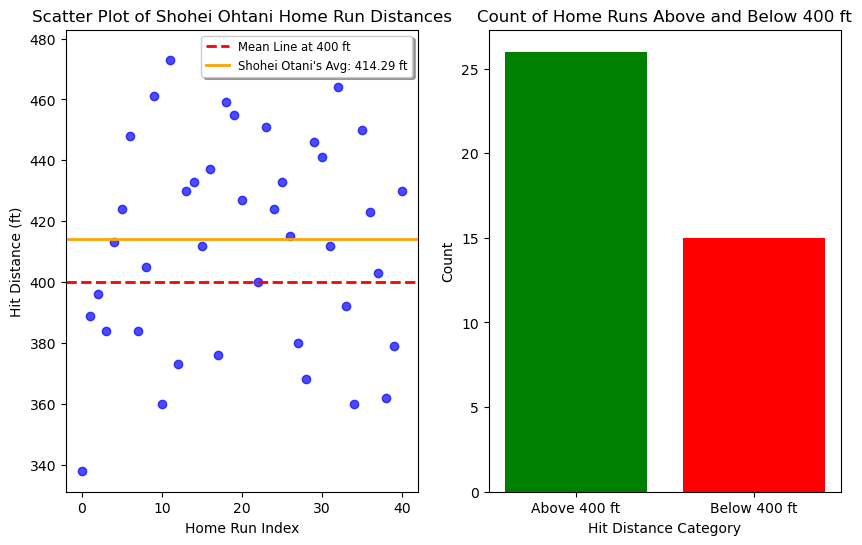

In [88]:
average_distance = hit_distance_sc.mean()

# Calculate counts of home runs above and below 400 ft
above_mean_count = (hit_distance_sc > 400).sum()
below_mean_count = (hit_distance_sc <= 400).sum()

# Create a scatter plot
plt.figure(figsize=(10, 6))  # Set the figure size
plt.subplot(1,2,1)
plt.scatter(x=range(len(hit_distance_sc)), y=hit_distance_sc, color='blue', alpha=0.7)

plt.title('Scatter Plot of Shohei Ohtani Home Run Distances')
plt.xlabel('Home Run Index')
plt.ylabel('Hit Distance (ft)')

# Add a mean line at 400 ft
plt.axhline(y=400, color='red', linestyle='--', linewidth=2, label='Mean Line at 400 ft')

# Add a line for Aaron Judge's average hit distance
plt.axhline(y=average_distance, color='orange', linestyle='-', linewidth=2, label=f"Shohei Otani's Avg: {average_distance:.2f} ft")

# Add legend
plt.legend(loc='upper right', fontsize='small', shadow=True)

# Add labels and title
plt.subplot(1,2,2)
plt.bar(['Above 400 ft', 'Below 400 ft'], [above_mean_count, below_mean_count], color=['green', 'red'])
plt.title('Count of Home Runs Above and Below 400 ft')
plt.xlabel('Hit Distance Category')
plt.ylabel('Count')


# Show the plot
plt.show()